In [1]:
from scrape import get_results
from scrape import get_data
from scrape import grab_years_played
from scrape import revised_run
from scrape import train_test

2022 RB Projections

In [2]:
X_train2022, X_test2022 = train_test('rb', num_years=5, year_for=2022)
results = revised_run(X_train2022, X_test2022, 'rb', year_for='2022')
results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 4.211550379058008
======= Fold 1 ========
Our accuracy on the validation set is 4.567985933956087
======= Fold 2 ========
Our accuracy on the validation set is 3.8486304913457174
======= Fold 3 ========
Our accuracy on the validation set is 4.011934674217549
======= Fold 4 ========
Our accuracy on the validation set is 4.921274644831617
Overall accuracy: 4.3122752246817955
iteration 1: Dimensions = (74, 2)
iteration 2: Dimensions = (148, 2)
iteration 3: Dimensions = (222, 2)
iteration 4: Dimensions = (296, 2)
iteration 5: Dimensions = (370, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,18.122432,0,1,1
1,christian-mccaffrey,16.436871,0,2,2
2,josh-jacobs,16.331226,1,3,3
3,breece-hall,14.975548,1,4,42
4,joe-mixon,14.675774,1,5,10
5,dandre-swift,14.663747,1,6,21
6,saquon-barkley,14.640517,1,7,5
7,dameon-pierce,14.108325,1,8,27
8,kenneth-walker-rb,14.063504,1,9,18
9,rhamondre-stevenson,13.934125,1,10,7


======= Fold 0 ========
Our accuracy on the validation set is 3.2466056578944635
======= Fold 1 ========
Our accuracy on the validation set is 4.284976588232675
======= Fold 2 ========
Our accuracy on the validation set is 3.777701969479958
======= Fold 3 ========
Our accuracy on the validation set is 3.579535028642211
======= Fold 4 ========
Our accuracy on the validation set is 4.104651677219925
Overall accuracy: 3.798694184293846
iteration 1: Dimensions = (74, 2)
iteration 2: Dimensions = (148, 2)
iteration 3: Dimensions = (222, 2)
iteration 4: Dimensions = (296, 2)
iteration 5: Dimensions = (370, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,23.4084,0,1,1
1,christian-mccaffrey,19.6468,0,2,2
2,nick-chubb,15.8876,1,3,6
3,derrick-henry,15.8608,1,4,4
4,josh-jacobs,15.3888,1,5,3
5,breece-hall,14.9782,1,6,42
6,saquon-barkley,14.4072,1,7,5
7,tony-pollard,14.1528,1,8,8
8,jonathan-taylor,13.9226,1,9,33
9,kenneth-walker-rb,13.5418,1,10,18


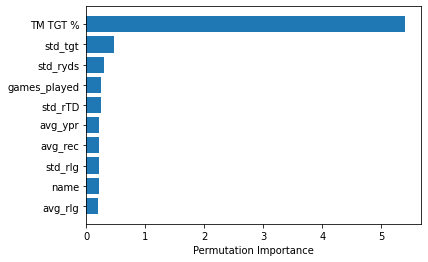

In [3]:
results = revised_run(X_train2022, X_test2022, 'rb', model_ = 'rf', pca=False)
results.head(50)

In [4]:
results = revised_run(X_train2022, X_test2022, 'rb', model_ = 'svr')
results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.8802567732147737
======= Fold 1 ========
Our accuracy on the validation set is 4.954981360029973
======= Fold 2 ========
Our accuracy on the validation set is 3.8187372010986302
======= Fold 3 ========
Our accuracy on the validation set is 4.377909737915555
======= Fold 4 ========
Our accuracy on the validation set is 4.837052751399807
Overall accuracy: 4.373787564731748
iteration 1: Dimensions = (74, 2)
iteration 2: Dimensions = (148, 2)
iteration 3: Dimensions = (222, 2)
iteration 4: Dimensions = (296, 2)
iteration 5: Dimensions = (370, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,16.085590,0,1,1
1,christian-mccaffrey,16.000751,0,2,2
2,josh-jacobs,15.216621,1,3,3
3,breece-hall,15.103925,1,4,42
4,derrick-henry,13.684439,1,5,4
5,kenneth-walker-rb,13.492028,1,6,18
6,nick-chubb,13.442389,1,7,6
7,joe-mixon,13.261427,1,8,10
8,saquon-barkley,13.199011,1,9,5
9,aaron-jones,13.102511,0,10,9


In [5]:
X_train2022, X_test2022 = train_test('rb', num_years=5, year_for=2022, scoring='HALF')
results = revised_run(X_train2022, X_test2022, 'rb', year_for='2022', scoring='HALF')
results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.820637214754987
======= Fold 1 ========
Our accuracy on the validation set is 3.8676714340711422
======= Fold 2 ========
Our accuracy on the validation set is 4.520295332170638
======= Fold 3 ========
Our accuracy on the validation set is 3.3435141713329273
======= Fold 4 ========
Our accuracy on the validation set is 3.1654162238667425
Overall accuracy: 3.7435068752392873
iteration 1: Dimensions = (69, 2)
iteration 2: Dimensions = (138, 2)
iteration 3: Dimensions = (207, 2)
iteration 4: Dimensions = (276, 2)
iteration 5: Dimensions = (345, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,18.229800,0,1,1
1,josh-jacobs,15.374924,0,2,3
2,christian-mccaffrey,14.302788,0,3,2
3,breece-hall,14.276518,4,4,42
4,nick-chubb,14.259811,1,5,5
5,saquon-barkley,13.753172,0,6,6
6,jonathan-taylor,13.597147,1,7,34
7,derrick-henry,13.052289,0,8,4
8,aaron-jones,12.869429,2,9,9
9,dandre-swift,12.811798,2,10,22


======= Fold 0 ========
Our accuracy on the validation set is 2.931106663485189
======= Fold 1 ========
Our accuracy on the validation set is 3.3688956090980327
======= Fold 2 ========
Our accuracy on the validation set is 4.575214817361039
======= Fold 3 ========
Our accuracy on the validation set is 3.4513367564249657
======= Fold 4 ========
Our accuracy on the validation set is 3.3053101641525267
Overall accuracy: 3.5263728021043503
iteration 1: Dimensions = (69, 2)
iteration 2: Dimensions = (138, 2)
iteration 3: Dimensions = (207, 2)
iteration 4: Dimensions = (276, 2)
iteration 5: Dimensions = (345, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,20.6038,0,1,1
1,christian-mccaffrey,16.2726,0,2,2
2,josh-jacobs,15.9602,0,3,3
3,nick-chubb,14.9790,1,4,5
4,derrick-henry,14.7852,0,5,4
5,saquon-barkley,14.0872,0,6,6
6,jonathan-taylor,13.4022,1,7,34
7,tony-pollard,13.1854,0,8,7
8,breece-hall,12.0166,4,9,42
9,najee-harris-rb,11.5298,2,10,14


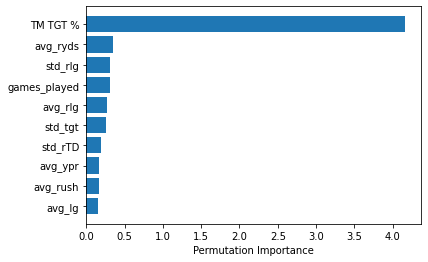

In [6]:
results = revised_run(X_train2022, X_test2022, 'rb', model_ = 'rf', pca=False, scoring='HALF')
results.head(50)

In [7]:
results = revised_run(X_train2022, X_test2022, 'rb', year_for='2022', model_='svr', scoring='HALF')
results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.5339431043479723
======= Fold 1 ========
Our accuracy on the validation set is 3.6618245005489114
======= Fold 2 ========
Our accuracy on the validation set is 4.725079546477528
======= Fold 3 ========
Our accuracy on the validation set is 3.6354629908767424
======= Fold 4 ========
Our accuracy on the validation set is 3.8989832410620124
Overall accuracy: 3.8910586766626336
iteration 1: Dimensions = (69, 2)
iteration 2: Dimensions = (138, 2)
iteration 3: Dimensions = (207, 2)
iteration 4: Dimensions = (276, 2)
iteration 5: Dimensions = (345, 2)


,name,proj fpts,class,rank,last rank
0,austin-ekeler,15.733749,0,1,1
1,josh-jacobs,14.236174,0,2,3
2,nick-chubb,14.106034,1,3,5
3,christian-mccaffrey,14.026500,0,4,2
4,derrick-henry,13.612848,0,5,4
5,saquon-barkley,12.693173,0,6,6
6,tony-pollard,12.502555,0,7,7
7,breece-hall,12.439781,4,8,42
8,kenneth-walker-rb,12.271187,1,9,16
9,aaron-jones,12.084865,2,10,9
